In [190]:
import csv
import numpy as np
from matplotlib import pyplot as plt


data_rows=[]
data_labels=[]
with open('wine.data','r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        data_rows.append(row[1:])
        data_labels.append(row[0])
data_rows = np.matrix(data_rows).astype(np.float) 


In [191]:
cov = np.cov(data_rows.T)
print(cov.shape)
print(cov)


(13, 13)
[[ 6.59062328e-01  8.56113090e-02  4.71151590e-02 -8.41092903e-01
   3.13987812e+00  1.46887218e-01  1.92033222e-01 -1.57542595e-02
   6.35175205e-02  1.02828254e+00 -1.33134432e-02  4.16978226e-02
   1.64567185e+02]
 [ 8.56113090e-02  1.24801540e+00  5.02770393e-02  1.07633171e+00
  -8.70779534e-01 -2.34337723e-01 -4.58630366e-01  4.07333619e-02
  -1.41146982e-01  6.44838183e-01 -1.43325638e-01 -2.92447483e-01
  -6.75488666e+01]
 [ 4.71151590e-02  5.02770393e-02  7.52646353e-02  4.06208278e-01
   1.12293658e+00  2.21455913e-02  3.15347299e-02  6.35847140e-03
   1.51557799e-03  1.64654327e-01 -4.68215451e-03  7.61835841e-04
   1.93197391e+01]
 [-8.41092903e-01  1.07633171e+00  4.06208278e-01  1.11526862e+01
  -3.97476036e+00 -6.71149146e-01 -1.17208281e+00  1.50421856e-01
  -3.77176220e-01  1.45024186e-01 -2.09118054e-01 -6.56234368e-01
  -4.63355345e+02]
 [ 3.13987812e+00 -8.70779534e-01  1.12293658e+00 -3.97476036e+00
   2.03989335e+02  1.91646988e+00  2.79308703e+00 -4.5556

In [192]:
mean = np.mean(data_rows,axis=0)
print(mean.shape)
data_rows = data_rows - mean
print(data_rows.shape)
# std_dev.reshape((13,1))
# std_dev = np.diag(std_dev.T)
std_dev = np.sqrt(np.diag(np.diag(cov)))
print(std_dev)
data_rows = np.matmul(data_rows,np.linalg.inv(std_dev))

(1, 13)
(178, 13)
[[8.11826538e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.11714610e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.74344009e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.33956377e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.42824835e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000

<BarContainer object of 13 artists>

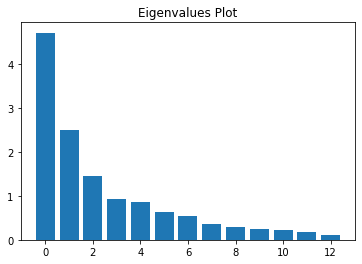

In [201]:
cov = np.cov(data_rows.T)

values,vectors = np.linalg.eig(cov)
# index = np.argsort(values)
# values = values[index]
# vectors = vectors[index]
# print(values)
fig1 = plt.figure()
p1 = fig1.add_subplot(111,title='Eigenvalues Plot')
p1.bar([i for i in range(len(values))],np.flip(np.sort(values)))

In [194]:
print(vectors[:,11:13].shape)
print(data_rows.shape)
red_data = np.matmul(data_rows, vectors[:,:2])

red_data = np.matrix(red_data)
print(red_data.shape)

(13, 2)
(178, 13)
(178, 2)


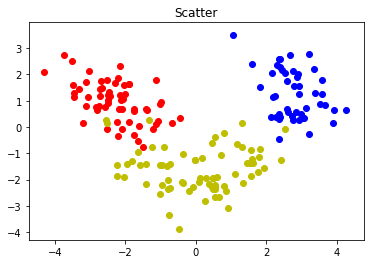

In [195]:
fig2 = plt.figure()
p2 = fig2.add_subplot(111,title='Scatter')
p2.scatter(np.array(red_data[:59,0]),np.array(red_data[:59,1]),c='r')
p2.scatter(np.array(red_data[59:131,0]),np.array(red_data[59:131,1]),c='y')
p2.scatter(np.array(red_data[131:,0]),np.array(red_data[131:,1]),c='b')